 ### Diabetes Prediction Using Machine Learning

### Loading Dataset  

In [2]:
# Importing pandas library

In [2]:
import pandas as pd

In [3]:
db=pd.read_csv("diabetes.csv")

### Data Exploration

In [5]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
db.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [34]:
# Knowing the data types of variables

In [35]:
db.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Data Preprocessing

In [36]:
# Checking whether there are any duplicates

In [37]:
db.shape

(768, 9)

In [38]:
db=db.drop_duplicates()

In [39]:
db.shape

(768, 9)

In [40]:
# No duplicates found

In [41]:
# Checking whether there are any null values

In [42]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [43]:
# No null values found

In [44]:
db.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [45]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Since the min values of some attributes are zero, which is not acceptable.   We replace the zero values of attributes Glucose, BloodPressure, SkinThickness,Insulin and BMI with the mean of their respective attributes.

In [46]:
db['Glucose']=db['Glucose'].replace(0,db['Glucose'].mean())
db['BloodPressure']=db['BloodPressure'].replace(0,db['BloodPressure'].mean())
db['SkinThickness']=db['SkinThickness'].replace(0,db['SkinThickness'].mean())
db['Insulin']=db['Insulin'].replace(0,db['Insulin'].mean())
db['BMI']=db['BMI'].replace(0,db['BMI'].mean())

In [47]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [36]:
# Min values of the attributes are replaced by their mean values.

### Data Visualization

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

0    500
1    268
Name: Outcome, dtype: int64

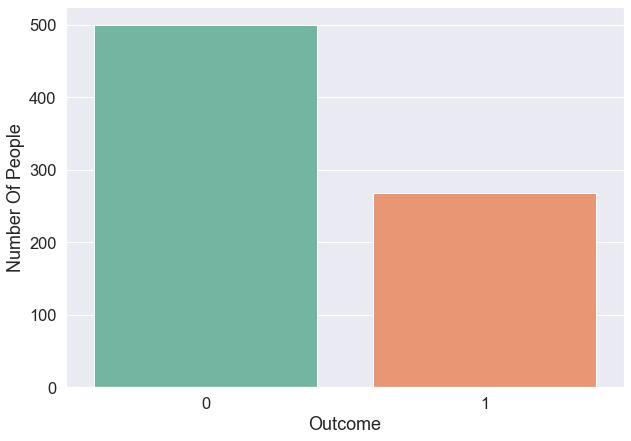

In [116]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
sns.countplot(x='Outcome',data=db,palette="Set2")
plt.ylabel('Number Of People')
db['Outcome'].value_counts()

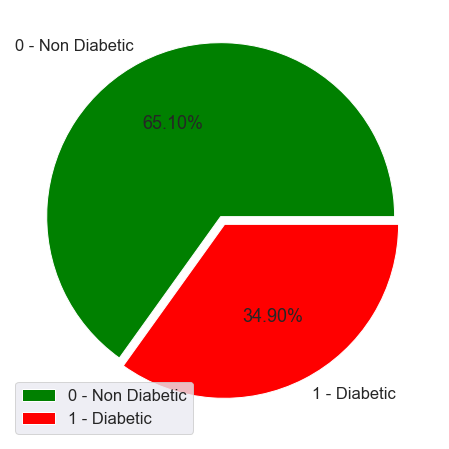

In [117]:
plt.figure(figsize=(8,8))
pieC=db['Outcome'].value_counts()
explode=(0.05,0)
colors=['green','red']
labels=['0 - Non Diabetic','1 - Diabetic']
sns.set(font_scale=1.5)
plt.pie(pieC,labels=('0 - Non Diabetic','1 - Diabetic'),autopct="%.2f%%",explode=explode,colors=colors)
plt.legend(labels,loc='lower left')

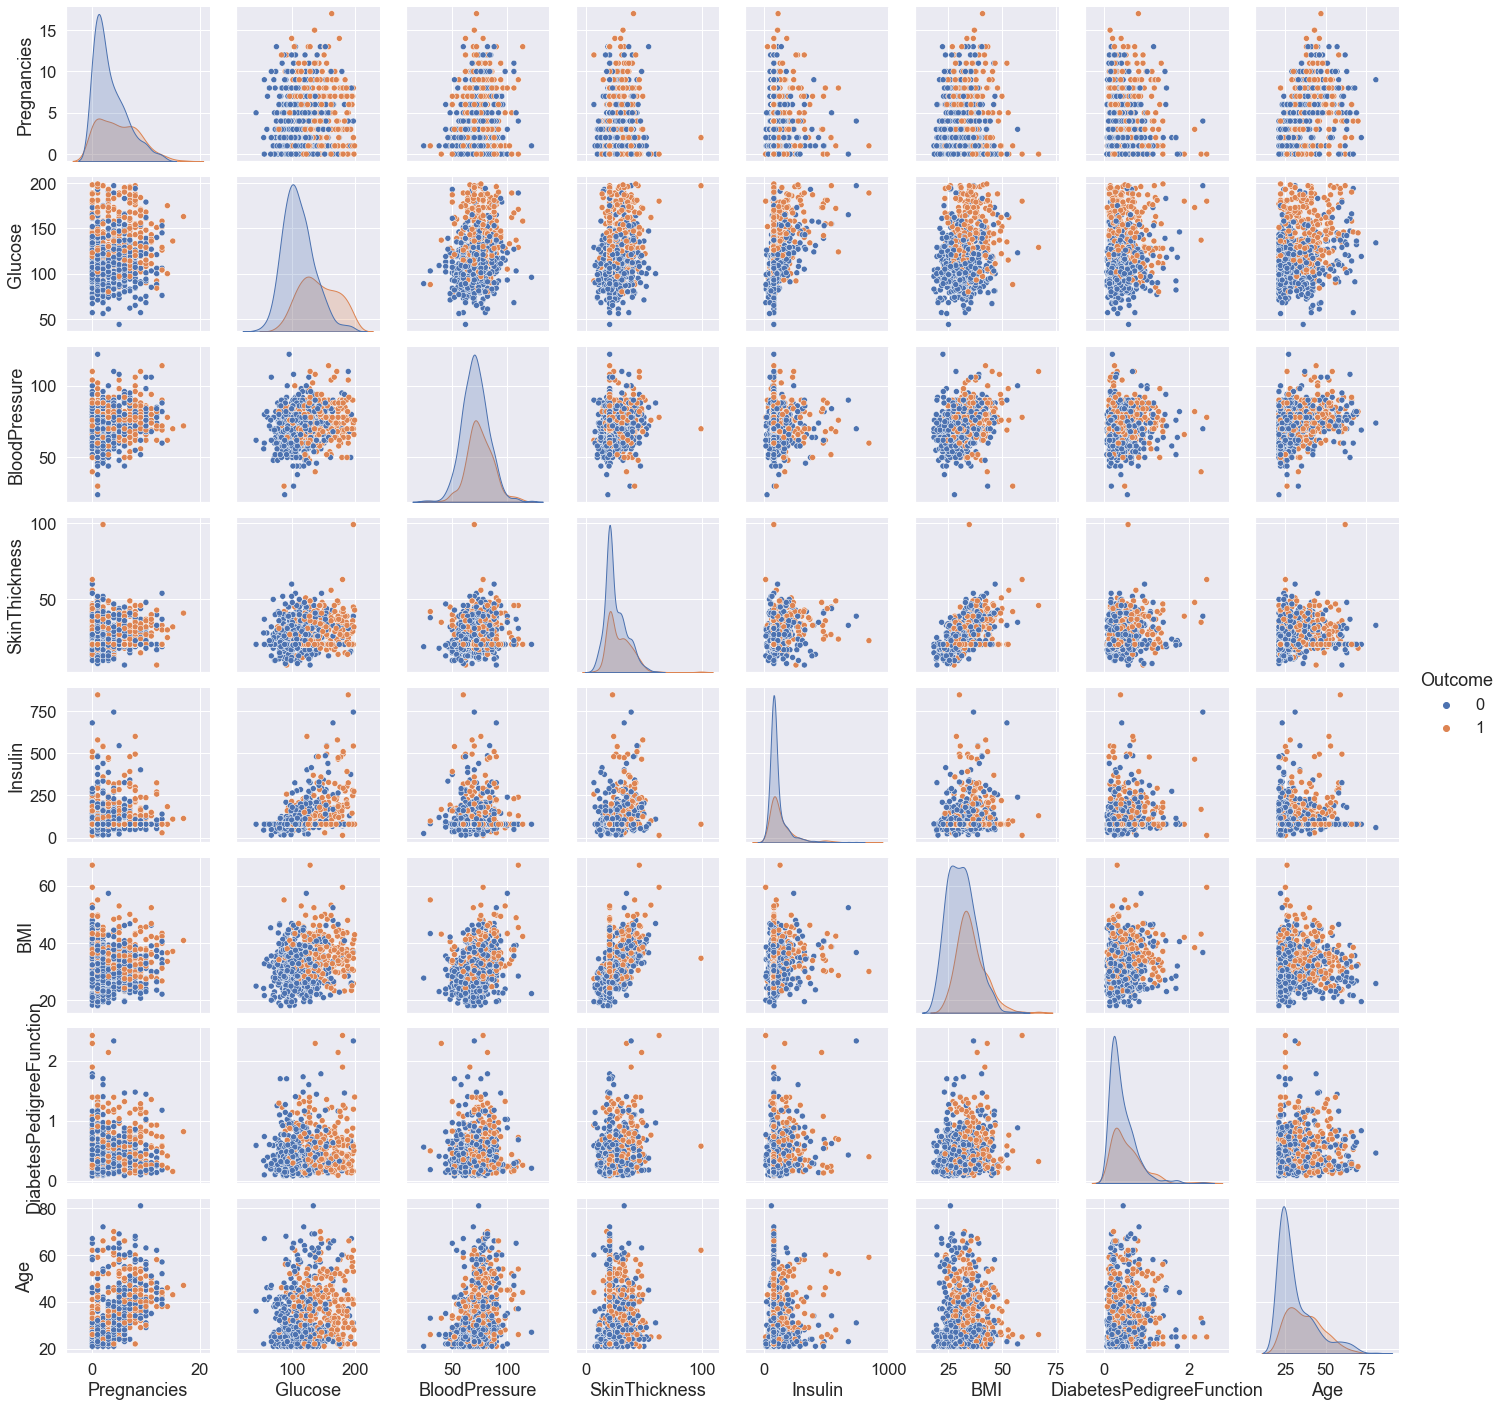

In [118]:
sns.pairplot(data=db,hue='Outcome')
plt.show()

In [119]:
# Finding correlation between attributes

In [120]:
db.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


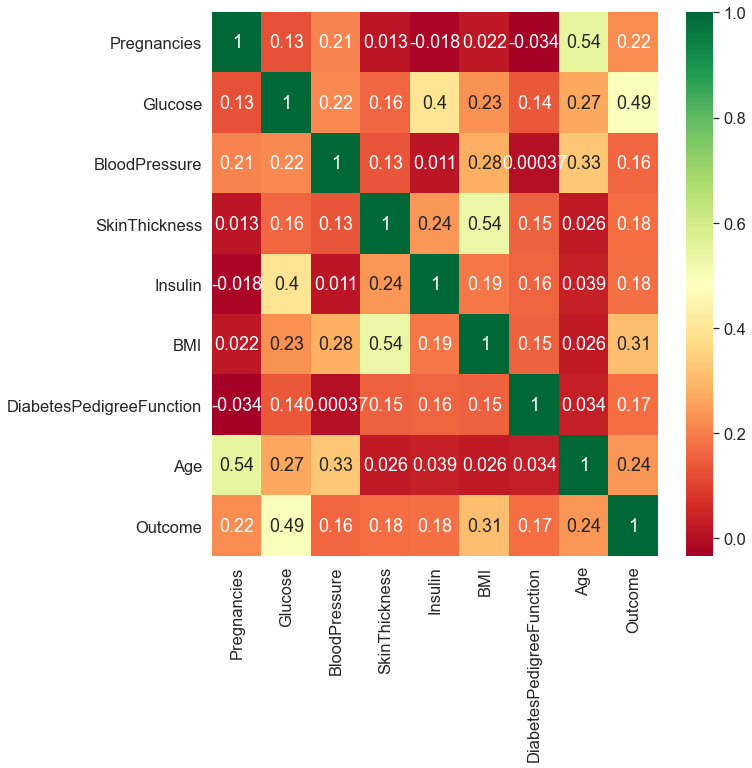

In [121]:
corrmat=db.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(db[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [58]:
# Glucose is having highest correlation with outcome, followed by BMI, Age, Pregnancies,......

### Spliting of data

In [60]:
target_name='Outcome'
y=db[target_name]
x=db.drop(target_name,axis=1)

In [61]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [62]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [67]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
SSX=scaler.transform(x)

### Splitting data into train and test data set

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(SSX,y,test_size=0.2,random_state=7)

In [69]:
x_train.shape,y_train.shape

((614, 8), (614,))

In [70]:
x_test.shape,y_test.shape

((154, 8), (154,))

### Building the Classification Algorithms

### Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(x_train,y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [90]:
lr_pred=lr.predict(x_test)

### Model Evaluation

In [91]:
# Train Score and Test Score

In [93]:
from sklearn.metrics import accuracy_score
print("Train Accuracy of Logistic Regression ",lr.score(x_train,y_train)*100)
print("Accuracy(Test) score of Logistic Regression ",lr.score(x_test,y_test)*100)
print("Accuracy(Test) score of Logistic Regression",accuracy_score(y_test,lr_pred)*100)

Train Accuracy of Logistic Regression  77.36156351791531
Accuracy(Test) score of Logistic Regression  77.27272727272727
Accuracy(Test) score of Logistic Regression 77.27272727272727


In [ ]:
# Confusion Matrix

In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,lr_pred)

array([[86, 11],
       [24, 33]], dtype=int64)

In [94]:
# We got 77.27% accuracy with Logistic Regression.

### KNearest Neighbors Algorithm

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [101]:
knn_pred=knn.predict(x_test)

### Model Evaluation

In [102]:
# Train Score and Test Score

In [104]:
from sklearn.metrics import accuracy_score
print("Train Accuracy of KNN ",knn.score(x_train,y_train)*100)
print("Accuracy(Test) score of KNN ",knn.score(x_test,y_test)*100)
print("Accuracy(Test) score of KNN ",accuracy_score(y_test,knn_pred)*100)

Train Accuracy of KNN  81.10749185667753
Accuracy(Test) score of KNN  74.67532467532467
Accuracy(Test) score of KNN  74.67532467532467


In [ ]:
# Confusion Matrix

In [105]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,knn_pred)

array([[82, 15],
       [24, 33]], dtype=int64)

In [ ]:
# We got 74.67% accuracy with KNearest Neighbors Algorithm

### Naive Bayes Algorithm

In [106]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
# Making Prediction

In [107]:
nb_pred=nb.predict(x_test)

In [108]:
# Train Score and Test Score

### Model Evaluation

In [109]:
from sklearn.metrics import accuracy_score
print("Train Accuracy of Naive Bayes",nb.score(x_train,y_train)*100)
print("Accuracy(Test) score of Naive Bayes ",nb.score(x_test,y_test)*100)
print("Accuracy(Test) score of Naive Bayes",accuracy_score(y_test,nb_pred)*100)

Train Accuracy of Naive Bayes 74.2671009771987
Accuracy(Test) score of Naive Bayes  74.02597402597402
Accuracy(Test) score of Naive Bayes 74.02597402597402


In [110]:
# Confusion Matrix

In [111]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,nb_pred)

array([[78, 19],
       [21, 36]], dtype=int64)

In [ ]:
# We got 74.02% accuracy with Naive Bayes Algorithm.

### Decision Tree Algorithm

In [71]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [72]:
# Making Prediction

In [73]:
dt_pred=dt.predict(x_test)

###  Model Evaluation

In [74]:
# Train Score and Test Score

In [75]:
from sklearn.metrics import accuracy_score
print("Train Accuracy of Decision Tree ",dt.score(x_train,y_train)*100)
print("Accuracy(Test) score of Decision Tree ",dt.score(x_test,y_test)*100)
print("Accuracy(Test) score of Decision Tree ",accuracy_score(y_test,dt_pred)*100)

Train Accuracy of Decision Tree  100.0
Accuracy(Test) score of Decision Tree  79.87012987012987
Accuracy(Test) score of Decision Tree  79.87012987012987


In [ ]:
# Confusion Matrix

In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,dt_pred)

array([[80, 17],
       [14, 43]], dtype=int64)

In [76]:
# We got 79.87% accuracy with DecisionTreeClassifier

### Random Forest  Algorithm

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy')
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [78]:
# Making Prediction

In [79]:
rf_pred=rf.predict(x_test)

### Model Evaluation

In [80]:
from sklearn.metrics import accuracy_score
print("Train Accuracy of Random Forest ",rf.score(x_train,y_train)*100)
print("Accuracy(Test) score of Random Forest ",rf.score(x_test,y_test)*100)
print("Accuracy(Test) score of Random Forest",accuracy_score(y_test,rf_pred)*100)

Train Accuracy of Random Forest  100.0
Accuracy(Test) score of Random Forest  81.16883116883116
Accuracy(Test) score of Random Forest 81.16883116883116


In [ ]:
# Confusion Matrix

In [98]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,rf_pred)

array([[86, 11],
       [18, 39]], dtype=int64)

In [81]:
# We got 81.16% accuracy from Random Forest Classifier.

### Support Vector Machine Algorithm

In [82]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [83]:
# Making prediction

In [84]:
sv_pred=sv.predict(x_test)

### Model Evaluation

In [86]:
from sklearn.metrics import accuracy_score
print("Train Accuracy of Support Vector Machine",sv.score(x_train,y_train)*100)
print("Accuracy(Test) score of Support Vector Machine ",sv.score(x_test,y_test)*100)
print("Accuracy(Test) score of Support Vector Machine",accuracy_score(y_test,sv_pred)*100)

Train Accuracy of Support Vector Machine 81.92182410423453
Accuracy(Test) score of Support Vector Machine  83.11688311688312
Accuracy(Test) score of Support Vector Machine 83.11688311688312


In [ ]:
# Confusion Matrix

In [99]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,sv_pred)

array([[91,  6],
       [20, 37]], dtype=int64)

In [95]:
# We got 83.11% accuracy with Support Vector Machine

 ### Result : The model that we built using the Support Vector Machine gave us the highest accuracy of                                           83.11% in classifying the patients as diabetic or non-diabetic. 